In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline, BSpline
from sklearn.linear_model import ElasticNet

$$\frac{-\Big[\frac{-U}{\lambda(2-q)} + 1\Big]^{\frac{1-q}{2-q}}}{\lambda(1-q)}$$

In [2]:
def inverse_cdf(λ, q, U):
    k = -((-U/(λ*(2-q))) + 1)**((1-q)/(2-q))
    return k/(λ*(1-q))

$$(2-q)\lambda e_{q}(-\lambda x)$$

$$e_{q} = [1 + (1 - q)x]^{1/(1-q)}$$

In [3]:
def eq(x):
    return (1 + (1 - q) * x)**(1/(1-q))

def pdf(λ, q, x):
    return (2 - q) * λ * eq(-λ*x)

In [4]:
# Scott's bin size
def bin_width(σ, n):
    return 3.5 * (σ/(n**(1/3)))

def num_of_bins(data):
    σ = np.std(data)
    n = len(data)
    width = bin_width(σ, n)
    return np.ceil((np.max(data) - np.min(data))/ width), width

In [5]:
def histogram(data, bins):
    sorted_data = np.sort(data)
    X = np.unique(sorted_data)
    j = 0
    count = 0
    Px = []
    for i in range(0, X.shape[0], bins):
        X_min = X[i]
        if (i + bins >= X.shape[0]):
            X_max = X.max() + 1
        else:
            X_max = X[i + bins]
        while((j < sorted_data.shape[0]) and (X_min <= sorted_data[j] < X_max)):
            count += 1
            j += 1
        Px.append(count)
        count = 0
    return X[::bins], np.array(Px)/ len(data)

In [6]:
def histogram_power2(data):
    sorted_data = np.sort(data)
    X = np.unique(sorted_data)
    width = [2**i for i in range(int(np.floor(np.log(X.astype('int').max())/np.log(2))))]
    X_values = []
    x = 0
    for w in width:
        x += w
        X_values.append(x)
    X_values.append(X.astype('int').max())
    j = 0
    count = 0
    CPx = []
    for i in range(1, len(X_values)):
        while((j < sorted_data.shape[0]) and (X_values[i-1] <= sorted_data[j] < X_values[i])):
            count += 1
            j += 1
        CPx.append(count)
        count = 0
    return X, np.array(CPx), X_values

In [7]:
data = np.loadtxt("/home/marcio/qExp13_2.txt", delimiter=',')

In [8]:
X, CPx, X_values = histogram_power2(data)

In [9]:
width = [2**i for i in range(int(np.floor(np.log(X.astype('int').max())/np.log(2))))]

In [10]:
Px = np.array([CPx[i]/width[i] for i in range(len(CPx))]) / len(data)

In [11]:
λ = 2
q = 1.3
# X = np.linspace(0,1000, 100)
fx = pdf(λ, q, np.array(X_values)[:-1])

In [12]:
from scipy import integrate

In [13]:
integrate.simps(fx, X_values[:-1])

0.22489715420264306

In [14]:
integrate.simps(Px, X_values[:-1])

0.25593097499999995

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


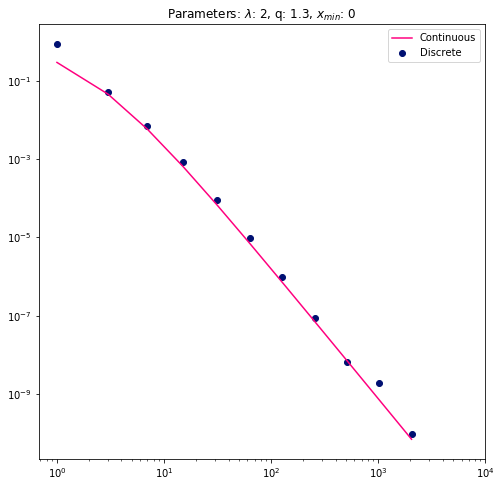

In [15]:
# plot it!
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_values[:-1], Px, color='#001072', marker='o', label='Discrete')
# ax.scatter(X_values[:-1], Px/(len(data)), color='#001072', marker='x', label='Discrete / 10E5')
# ax.plot(X_values[:-1], Px, color='#001072', alpha=0.25, label='Discrete')
plt.title("Parameters: $\lambda$: " + str(λ) + ", q: " + str(q) + ", $x_{min}$: 0")
ax.plot(X_values[:-1], fx, color='#FF007F', label='Continuous')
ax.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 10000)
plt.savefig("Comparison.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')
plt.show()